In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
#examine the data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [5]:
missing_val_count_by_column = (train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The corr() function shows correlation between the numerical features. It looks like Fare had a slight impact on Survivability

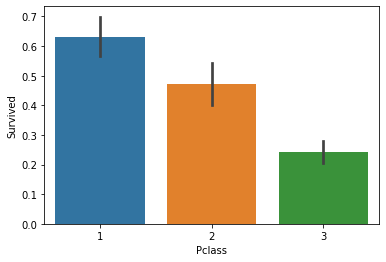

In [8]:
import seaborn as sns
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

The Pclass (socio-economic status) also effected survivability positively

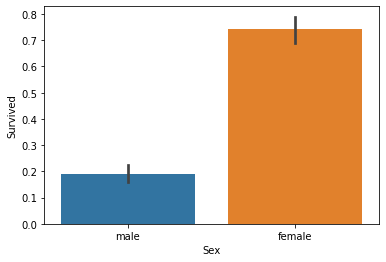

In [9]:
sns.barplot(x =train_data['Sex'] , y =train_data ['Survived'])

In [10]:
# get data where age is not null

clean_train_data = train_data.copy()
clean_train_data  = clean_train_data.dropna(subset = ['Age'])
print(clean_train_data.shape)
clean_test_data = test_data.copy()
clean_test_data = clean_test_data.dropna(subset = ['Age'])
print(clean_test_data.shape)

(714, 12)
(332, 11)


In [11]:
combined_data = clean_train_data.append(clean_test_data)

combined_data.shape

(1046, 12)

In [12]:
combined_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [13]:
import re
def getTitle(txt):
    x = re.findall("([A-Za-z]+)\.", txt)[0]
    return x

In [14]:
combined_data['Title'] = combined_data['Name'].apply(getTitle)
train_data['Title'] = train_data['Name'].apply(getTitle)
test_data['Title'] = test_data['Name'].apply(getTitle)

In [15]:
combined_data['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
409    Miss
411     Mrs
412    Miss
414    Dona
415      Mr
Name: Title, Length: 1046, dtype: object

In [16]:
grouped = combined_data.groupby('Title')

In [17]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [18]:
grouped.groups

{'Capt': Int64Index([745], dtype='int64'),
 'Col': Int64Index([647, 694, 131, 202], dtype='int64'),
 'Countess': Int64Index([759], dtype='int64'),
 'Don': Int64Index([30], dtype='int64'),
 'Dona': Int64Index([414], dtype='int64'),
 'Dr': Int64Index([245, 317, 398, 632, 660, 796, 293], dtype='int64'),
 'Jonkheer': Int64Index([822], dtype='int64'),
 'Lady': Int64Index([556], dtype='int64'),
 'Major': Int64Index([449, 536], dtype='int64'),
 'Master': Int64Index([  7,  16,  50,  59,  63,  78, 125, 164, 165, 171, 182, 183, 193,
             261, 278, 305, 340, 348, 386, 407, 445, 480, 489, 549, 751, 755,
             787, 788, 802, 803, 819, 824, 827, 831, 850, 869,  21,  55,  64,
              80,  89, 154, 161, 192, 194, 196, 201, 281, 307, 360, 379, 389,
             392],
            dtype='int64'),
 'Miss': Int64Index([  2,  10,  11,  14,  22,  24,  38,  39,  43,  44,
             ...
             354, 367, 371, 375, 376, 385, 400, 402, 409, 412],
            dtype='int64', length=210)

In [19]:
grouped.size()

Title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       53
Miss        210
Mlle          2
Mme           1
Mr          581
Mrs         170
Ms            1
Rev           8
Sir           1
dtype: int64

In [20]:
grouped.get_group('Mr')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,Mr
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,Mr
406,1298,NaN,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,Mr
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Mr


In [21]:
print(grouped.get_group('Mr').Age.median())
print(grouped.get_group('Master').Age.median())
print(grouped.get_group('Miss').Age.median())
print(grouped.get_group('Mrs').Age.median())
print(combined_data.Age.median())

29.0
4.0
22.0
35.5
28.0


In [22]:
import math
def fillerAge(row):
    if(not(math.isnan(row['Age']))):
        return row['Age']
    else:
        if(row['Title'] == "Mr"):
            return 29
        if(row['Title'] == "Master"):
            return 4
        if(row['Title'] == "Miss"):
            return 22
        if(row['Title'] == "Mrs"):
            return 36
        else:
            return 29      

In [23]:
train_data['Age'] = train_data.apply(fillerAge, axis=1) 

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [25]:
test_data['Age'] = test_data.apply(fillerAge, axis=1)

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [27]:
#Set the cut off at 16 instead of 18
train_data['IsAdult'] = train_data.Age.map(lambda i : i>16)

In [28]:
train_data['IsAdult']

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: IsAdult, Length: 891, dtype: bool

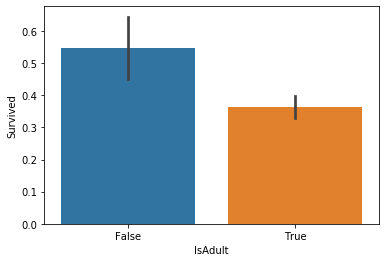

In [29]:
sns.barplot(x =train_data['IsAdult'] , y =train_data ['Survived'])

The greatest difference in rates of survival shown so far is clearly between the gender

In [30]:
train_data['IsRich'] = train_data['Fare'] > 100
#Pclass is similar, but 1st class tickets fares range from around 30 to 514 .So set the cut off to people who possible overpaid to 100

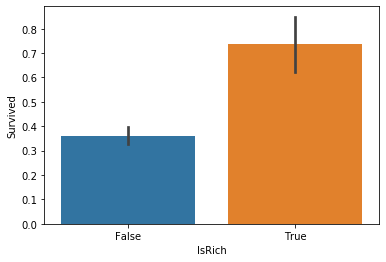

In [31]:
sns.barplot(x =train_data['IsRich'] , y =train_data ['Survived'])

In [32]:
train_data['IsMale'] = train_data['Sex'] == 'male'
test_data['IsMale'] = test_data['Sex'] == 'male' 

Run ML algorithms on just the coloumns - Age, Sex, PClass and Fare. Look at the highest prediction accuracy achieved and then go back to do some more data wrangling - converting alphabateical categorical coloumns to numerical etc

Use K fold cross validation since we dont have actual test data

In [33]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsAdult,IsRich,IsMale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,True,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,True,False,True


In [34]:

X = np.array([[33, 32], [23, 24], [15, 9], [21, 6], [51,52]])
y = np.array([1, 2, 3, 4,5])
# y needs to have same number of rows as X
print("X is \n",X)
kf = KFold(n_splits=2)


print(kf)

for train_index, test_index in kf.split(X):
    print("Next Round")
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print("X_train is :",X_train,"\n X_test is:", X_test)
    y_train, y_test = y[train_index], y[test_index]
    print("y_train is: ",y_train,"\n y_test is:", y_test)

X is 
 [[33 32]
 [23 24]
 [15  9]
 [21  6]
 [51 52]]
KFold(n_splits=2, random_state=None, shuffle=False)
Next Round
TRAIN: [3 4] TEST: [0 1 2]
X_train is : [[21  6]
 [51 52]] 
 X_test is: [[33 32]
 [23 24]
 [15  9]]
y_train is:  [4 5] 
 y_test is: [1 2 3]
Next Round
TRAIN: [0 1 2] TEST: [3 4]
X_train is : [[33 32]
 [23 24]
 [15  9]] 
 X_test is: [[21  6]
 [51 52]]
y_train is:  [1 2 3] 
 y_test is: [4 5]


In [35]:
X = train_data[['Age', 'IsMale', 'Pclass','Fare']].to_numpy()
y = train_data['Survived'].to_numpy()
print(len(X), len(y))
print(len(X), len(y))
kf = KFold(n_splits=6)
# print(kf.get_n_splits(X))

print(kf)
acc_decision_tree=0

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    decision_tree = DecisionTreeClassifier()
    # the decision tree algo should be fit and predictions made inside this loop
    decision_tree.fit(X_train, y_train)
    #Y_pred_decision_tree = decision_tree.predict(X_test)
    acc_decision_tree =acc_decision_tree+ round(decision_tree.score(X_test, y_test) * 100, 2)

print("Average accuracy of Decision Tree is :", acc_decision_tree/6)


891 891
891 891
KFold(n_splits=6, random_state=None, shuffle=False)
Average accuracy of Decision Tree is : 78.45666666666666


In [36]:
#logistic regression
acc_log = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    #Y_pred_log = logreg.predict(X_test)
    acc_log = acc_log +round(logreg.score(X_test, y_test) * 100, 2)
print("Average accuracy of logistic regression is: ",acc_log/6)

Average accuracy of logistic regression is:  78.11666666666666


In [37]:
#KNN
acc_knn = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    #Y_pred_knn = knn.predict(X_test)
    acc_knn = acc_knn + round(knn.score(X_test, y_test) * 100, 2)
print("Average accuracy of KNN is: ",acc_knn/6)

Average accuracy of KNN is:  68.58166666666666


In [38]:
#SVM
acc_svc = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc = SVC()
    svc.fit(X_train, y_train)
    #Y_pred_svc = svc.predict(X_test)
    acc_svc = acc_svc + round(svc.score(X_test, y_test) * 100, 2)
print("Average accuracy of SVM is: ",acc_svc/6)

Average accuracy of SVM is:  65.44166666666668


In [39]:
#Gaussian
acc_GNB = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    acc_GNB = acc_GNB+ round(gaussian.score(X_test, y_test) * 100, 2)
print("Average accuracy of GNB is: ",acc_GNB/6)

Average accuracy of GNB is:  77.66833333333334


In [40]:
#Random Forest
acc_RF = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, y_train)
    acc_RF = acc_RF+ round(random_forest.score(X_test, y_test) * 100, 2)

print("Average accuracy of RF is: ",acc_RF/6)

Average accuracy of RF is:  81.37333333333333


In [41]:
X_train = train_data[['Age', 'IsMale', 'Pclass','Fare']]
Y_train = train_data['Survived']
X_test = test_data[['Age', 'IsMale', 'Pclass', 'Fare']]
print(X_train.shape, Y_train.shape, X_test.shape )

(891, 4) (891,) (418, 4)


In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   IsMale  418 non-null    bool   
 2   Pclass  418 non-null    int64  
 3   Fare    417 non-null    float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 10.3 KB


In [43]:
#test data contains null values, so impute with median
# median_age = test_data['Age'].median()
# test_data.Age.fillna(median_age, inplace=True)
median_fare = test_data['Fare'].median()
test_data.Fare.fillna(median_fare, inplace = True)

In [44]:
criterion= ['gini', 'entropy']
max_depth = [1, 3, 5, 10, None]

model = RandomForestClassifier(n_estimators=100)
grid = GridSearchCV(estimator = model, cv =3, param_grid =dict(criterion = criterion, max_depth = max_depth))

In [45]:
grid.fit(train_data[['Age', 'IsMale', 'Pclass','Fare']], train_data['Survived'])

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.8260381593714926
{'criterion': 'entropy', 'max_depth': 10}


In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   IsMale  418 non-null    bool   
 2   Pclass  418 non-null    int64  
 3   Fare    417 non-null    float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 10.3 KB


Trying XGBoost

In [49]:
from sklearn.model_selection import train_test_split
y=train_data['Survived']
X = train_data[['Age', 'IsMale', 'Pclass','Fare']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [64]:
train_X

,Age,IsMale,Pclass,Fare
802,11.00,True,1,120.0000
325,36.00,False,1,135.6333
101,29.00,True,3,7.8958
376,22.00,False,3,7.2500
544,50.00,True,1,106.4250
...,...,...,...,...
78,0.83,True,2,29.0000
401,26.00,True,3,8.0500
754,48.00,False,2,65.0000
732,29.00,True,2,0.0000


In [65]:
test_X

,Age,IsMale,Pclass,Fare
667,29.0,True,3,7.7750
55,29.0,True,1,35.5000
335,29.0,True,3,7.8958
280,65.0,True,3,7.7500
593,22.0,False,3,7.7500
...,...,...,...,...
679,36.0,True,1,512.3292
188,40.0,True,3,15.5000
583,36.0,True,1,40.1250
3,35.0,False,1,53.1000


In [66]:
train_y

802    1
325    1
101    0
376    1
544    0
      ..
78     1
401    0
754    1
732    0
801    1
Name: Survived, Length: 668, dtype: int64

In [67]:
test_y

667    0
55     1
335    0
280    0
593    0
      ..
679    1
188    0
583    0
3      1
764    0
Name: Survived, Length: 223, dtype: int64

In [50]:
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

[11:50:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [60]:
predictions = my_model.predict(test_X)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))
print("root mean square error: " + str (math.sqrt(mean_squared_error(test_y, predictions))))

Mean Absolute Error : 0.26682474046544646
root mean square error: 0.351208475746159


In [76]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=10, 
             eval_set=[(test_X, test_y)], verbose=False)

[13:57:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [77]:
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))
print("root mean square error: " + str (math.sqrt(mean_squared_error(test_y, predictions))))

Mean Absolute Error : 0.2578391849727374
root mean square error: 0.3502654289738305


In [57]:
X_test = test_data[['Age', 'IsMale', 'Pclass', 'Fare']]

Since random forest has the highest accuracy , We use it to make predictions

In [58]:
X_train = train_data[['Age', 'IsMale', 'Pclass','Fare']]
y_train = train_data['Survived']
random_forest = RandomForestClassifier(n_estimators=100, criterion= 'entropy', max_depth = 10)
random_forest.fit(X_train, y_train)
y_pred_RF = random_forest.predict(X_test)

In [59]:
print(len(test_data),  len(y_pred_RF))

418 418


In [60]:
# Using decision tree because it has the highest training accuracy
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_RF
    })
submission.to_csv('submission.csv', index=False)

In [61]:
train_data.shape, test_data.shape

((891, 16), (418, 13))